In [2]:
import pandas as pd
import os
import nibabel as nib
import numpy as np
import SimpleITK as sitk
from skimage.metrics import (adapted_rand_error, variation_of_information,
                              hausdorff_distance, mean_squared_error)


In [3]:
test_patients = ['zzAMLART081','zzAMLART082', 'zzAMLART083', 'zzAMLART084', 'zzAMLART085', 'zzAMLART086', 'zzAMLART087', 'zzAMLART088', 'zzAMLART089', 'zzAMLART090', 'zzAMLART091', 'zzAMLART092', 'zzAMLART093', 'zzAMLART094', 'zzAMLART095', 'zzAMLART096', 'zzAMLART097', 'zzAMLART098', 'zzAMLART099', 'zzAMLART100']

ground_dir = "/vol/biomedic3/bglocker/radiotherapy/kat100/nifti"
def ssn_task9():
    global network_type, task, prediction_dir, masks, regions
    network_type = "ssn"
    task = "Task9"
    prediction_dir = "/vol/bitbucket/djk18/cervical_Task9/test"
    masks = ["CTVn", "CTVp", "Anorectum"]
    regions = {}

def nnUnet_dataset505():
    global network_type, task, samples, prediction_dir, results_dir, masks, regions
    network_type = "nnunet"
    task = "Dataset505"
    samples = ["OUT_F0", "OUT_F1", "OUT_F2"]
    prediction_dir = "/vol/bitbucket/djk18/nnUnet_models/nnUNet_trained_models/Dataset505"
    results_dir = "/vol/bitbucket/djk18/results"
    masks = ["Bones", "FemoralHead", "Bladder", "Anorectum", "Bowel-bag", "Bowel-loops", "CTVp"]
    regions = {"Bones" : ["Bones", "FemoralHead"], "Bowel-bag" : ["Bowel-bag", "Bowel-loops"]}

def nnUnet_dataset506():
    global network_type, task, samples, prediction_dir, results_dir, masks, regions
    network_type = "nnunet"
    task = "Dataset506"
    samples = ["OUT_F0", "OUT_F1", "OUT_F2"]
    prediction_dir = "/vol/bitbucket/djk18/nnUnet_models/nnUNet_trained_models/Dataset506"
    results_dir = "/vol/bitbucket/djk18/results"
    masks = ["Bones", "FemoralHead", "Bladder", "Anorectum", "Bowel-bag", "Bowel-loops", "CTVp"]
    regions = {"Bones" : ["Bones", "FemoralHead"], "Bowel-bag" : ["Bowel-bag", "Bowel-loops"]}

def nnUnet_dataset507():
    global network_type, task, samples, prediction_dir, results_dir, masks, regions
    network_type = "ssn"
    task = "cervical_Task16_1050_full"
    samples = ["OUT_F0/upsampled", "OUT_F1/upsampled", "OUT_F2/upsampled", "OUT_F3/upsampled", "OUT_F4/upsampled"]
    prediction_dir = "/vol/bitbucket/djk18/nnUnet_models/nnUNet_trained_models/Dataset507"
    results_dir = "/vol/bitbucket/djk18/results"
    masks = ["CTVn", "CTVp", "Anorectum"]
    regions = {}

def ssn_task16():
    global ground_dir, network_type, task, samples, prediction_dir, results_dir, masks, regions
    ground_dir = "/vol/bitbucket/djk18/dataset/downsample_2m_isotropic"
    network_type = "ssn"
    task = "SSN"
    samples = ["predictions"]
    prediction_dir = "/vol/bitbucket/djk18/cervical_Task16_1050_full/test/"
    results_dir = "/vol/bitbucket/djk18/results"
    masks = ["CTVn", "CTVp", "Anorectum"]
    regions = {}

def nnUnet_dataset505_kat():
    global network_type, task, samples, prediction_dir, results_dir, masks, regions, test_patients
    network_type = "nnunet"
    task = "Model505"
    samples = ["F0", "F1", "F2"]
    prediction_dir = "/vol/bitbucket/djk18/nnUnet_models/nnUNet_trained_models/Dataset505"
    results_dir = "/vol/bitbucket/djk18/results"
    masks = ["Bones", "FemoralHead", "Bladder", "Anorectum", "Bowel-bag", "Bowel-loops", "CTVp"]
    regions = {"Bones" : ["Bones", "FemoralHead"], "Bowel-bag" : ["Bowel-bag", "Bowel-loops"]}
    test_patients = ['zzAMLIOV001', 'zzAMLIOV002', 'zzAMLIOV003', 'zzAMLIOV004', 'zzAMLIOV005', 'zzAMLIOV006','zzAMLIOV007','zzAMLIOV008', 'zzAMLIOV009', 'zzAMLIOV010']


def nnUnet_dataset507_kat():
    global network_type, task, samples, prediction_dir, results_dir, masks, regions, test_patients
    network_type = "nnunet"
    task = "Model507"
    samples = ["F0_fullres", "F1_fullres", "F2_fullres", "F3_fullres", "F4_fullres"]
    #samples = ["F4_fullres"]
    prediction_dir = "/vol/bitbucket/djk18/nnUnet_models/nnUNet_trained_models/Dataset507"
    results_dir = "/vol/bitbucket/djk18/results"
    masks = ["CTVn", "CTVp", "Anorectum"]
    regions = {}
    test_patients = ['zzAMLIOV001', 'zzAMLIOV002', 'zzAMLIOV003', 'zzAMLIOV004', 'zzAMLIOV005', 'zzAMLIOV006','zzAMLIOV007','zzAMLIOV008', 'zzAMLIOV009', 'zzAMLIOV010']




#test_patients = ['zzAMLART081']

#ssn_task9()
#ssn_task16()
nnUnet_dataset506()

In [64]:
# Convert label map back to multiple bitmap files for use with SNNs

# ssn_dir = '/homes/djk18/Anatomical_contouring/stochastic_segmentation_networks'

# def get_test_infrance_dir(network_name):
#     return os.path.join(ssn_dir + "/jobs/" + network_name + "/test/predictions")
    
# def split_label_map_in_half(label_map):
#     # Split the label map in half along the x-axis
#     split_point = label_map.shape[0] // 2
#     left_half = label_map[:split_point, :, :]
#     right_half = label_map[split_point:, :, :]
#     return left_half, right_half

def split_femoral_heads(label_map, femoralhead_label):
    left_mask = np.zeros_like(label_map, dtype=np.uint8)
    right_mask = np.zeros_like(label_map, dtype=np.uint8)

    femoralhead_indices = np.where(label_map == femoralhead_label)

    min_row = np.min(femoralhead_indices[0])
    max_row = np.max(femoralhead_indices[0])

    split_row = (min_row + max_row) // 2

    right_mask[femoralhead_indices[0][femoralhead_indices[0] <= split_row],
              femoralhead_indices[1][femoralhead_indices[0] <= split_row],
              femoralhead_indices[2][femoralhead_indices[0] <= split_row]] = 255

    left_mask[femoralhead_indices[0][femoralhead_indices[0] > split_row],
               femoralhead_indices[1][femoralhead_indices[0] > split_row],
               femoralhead_indices[2][femoralhead_indices[0] > split_row]] = 255

    return left_mask, right_mask

def labels_to_masks(pred_dir, patient_list):
    #masks = ["Bones", "FemoralHead_L", "FemoralHead_R", "Bladder", "Anorectum", "Bowel-bag", "Bowel-loops", "CTVp"]
    #regions = {"Bones" : ["Bones", "FemoralHead_L", "FemoralHead_R"], "Bowel-bag" : ["Bowel-bag", "Bowel-loops"]}

    # masks = ["Bones", "FemoralHead", "Bladder", "Anorectum", "Bowel-bag", "Bowel-loops", "CTVp"]
    # regions = {"Bones" : ["Bones", "FemoralHead"], "Bowel-bag" : ["Bowel-bag", "Bowel-loops"]}
    
    for patient in patient_list:
       ## NNUNet
       #    output_dir = os.path.join(pred_dir, "patients", patient)

       # SNN
       output_dir = os.path.join(pred_dir, "patients", patient)


       if not os.path.exists(output_dir):
          os.makedirs(output_dir)

       label_map_path = os.path.join(pred_dir, patient + "_prediction.nii.gz")
       #label_map_path = os.path.join(pred_dir, patient + ".nii.gz")

       label_map = nib.load(label_map_path)
       label_map_header = label_map.header.copy()
       label_map_arr = np.array(label_map.dataobj)
       labels = np.unique(label_map_arr)

  
       print(labels)
       for i in labels:
           if (int(i) != 0):
            mask_name = masks[int(i) - 1]
            bit_map = np.zeros(label_map_arr.shape, dtype=np.dtype('u1'))
            #bit_map[label_map_arr == int(i)] = 255 #int(i)

            if mask_name == "FemoralHead":
                left_mask, right_mask = split_femoral_heads(label_map_arr, int(i))
                nib.save(nib.Nifti1Image(left_mask, None, header=label_map_header),
                            os.path.join(output_dir, "mask_FemoralHead_L.nii.gz"))
                nib.save(nib.Nifti1Image(right_mask, None, header=label_map_header),
                            os.path.join(output_dir, "mask_FemoralHead_R.nii.gz"))
            else:
                bit_map = np.zeros(label_map_arr.shape, dtype=np.dtype('u1'))
                bit_map[label_map_arr == i] = 255

                # Add other substructures to bit map
                if mask_name in regions:
                    for sub_class in regions[mask_name]:
                        sub_id = masks.index(sub_class)
                        bit_map[label_map_arr == sub_id + 1] = 255

                nib.save(nib.Nifti1Image(bit_map, None, header=label_map_header),
                            os.path.join(output_dir, "mask_" + mask_name + ".nii.gz"))


            # # Add other substructures to bit map
            # if mask_name in regions:
            #     for sub_class in regions[mask_name]:
            #         sub_id = masks.index(sub_class)
            #         bit_map[label_map_arr == int(sub_id + 1)] = 255


          
                
            # ni_img = nib.Nifti1Image(bit_map, None, header=label_map_header)
            # nib.save(ni_img, os.path.join(output_dir, "mask_" + masks[int(i) - 1] + ".nii.gz"))


In [67]:
#labels_to_masks("/vol/bitbucket/djk18/nnUnet_models/nnUNet_trained_models/Dataset506/OUT_F0", test_patients)
#labels_to_masks("/vol/bitbucket/djk18/nnUnet_models/nnUNet_trained_models/Dataset505/OUT_F1", test_patients)

# for sample in samples:
#     labels_to_masks(os.path.join("/vol/bitbucket/djk18/nnUnet_models/nnUNet_trained_models/Dataset505", samples), test_patients)

for sample in samples:
    print(task)
    labels_to_masks(os.path.join(prediction_dir, sample), test_patients)
#Kat
# for fold in samples:
#     labels_to_masks(os.path.join("/vol/bitbucket/djk18/hold_out_test", task, fold), test_patients)

SSN
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]


In [92]:
# This is an old function which just calculates dice and hausdorff. It's fast(er)
def evaluate_contours_old(pred, ground_truth):
    # Load the ground truth and automated contours

   
    ground_truth = sitk.ReadImage(ground_truth)

    # Try to load predicted class. If this class wasn't predicted, output metrics of 0
    try:
        pred = sitk.ReadImage(pred)
    except:
        print("Cannot read image at: ", pred)
        return {'Dice': 0, 'Hausdorff': 0}

    if ground_truth.GetOrigin() != pred.GetOrigin() or \
        ground_truth.GetSpacing() != pred.GetSpacing() or \
        ground_truth.GetDirection() != pred.GetDirection():
        pred.SetOrigin(ground_truth.GetOrigin())
        pred.SetSpacing(ground_truth.GetSpacing())
        pred.SetDirection(ground_truth.GetDirection())


    overlap_filter = sitk.LabelOverlapMeasuresImageFilter()
    overlap_filter.Execute(ground_truth, pred)
    dice = overlap_filter.GetDiceCoefficient()
    Hausdorff = overlap_filter.GetHausdorffCoefficient()
    

   
    
    # Return the results as a dictionary
    return {'Dice': dice, 'Hausdorff': Hausdorff}     


######### OPTION 2 -> works but has extra metrics ######




# This is quite slow. Computes ASSD as well
# This function is adapted from Z. Yaniv, B. C. Lowekamp, H. J. Johnson, R. Beare, "SimpleITK Image-Analysis Notebooks: a Collaborative Environment for Education and Reproducible Research", J Digit Imaging., https://doi.org/10.1007/s10278-017-0037-8, 31(3): 290-303, 2018.

from enum import Enum
import numpy as np
import SimpleITK as sitk

class OverlapMeasures(Enum):
    jaccard, dice = range(2)

class SurfaceDistanceMeasures(Enum):
    hausdorff_distance, mean_surface_distance = range(2)

def evaluate_contours(pred, ground_truth):
    # Load the ground truth and automated contours
    ground_truth = sitk.ReadImage(ground_truth)
    

    # Try to load predicted class. If this class wasn't predicted, output metrics of 0
    try:
        pred = sitk.ReadImage(pred)
        
    except:
        print("Cannot read image at: ", pred)
        return {'Dice': 0, 'Hausdorff': 0, 'ASSD': 0}

    if ground_truth.GetOrigin() != pred.GetOrigin() or \
        ground_truth.GetSpacing() != pred.GetSpacing() or \
        ground_truth.GetDirection() != pred.GetDirection():
        pred.SetOrigin(ground_truth.GetOrigin())
        pred.SetSpacing(ground_truth.GetSpacing())
        pred.SetDirection(ground_truth.GetDirection())
    
    pred  = sitk.Cast(pred, ground_truth.GetPixelID())


    overlap_filter = sitk.LabelOverlapMeasuresImageFilter()
    overlap_filter.Execute(ground_truth, pred)
    dice = overlap_filter.GetDiceCoefficient()

    # Compute surface distance measures
    surface_distance_results = np.zeros((1, 1))

    hausdorff_distance_filter = sitk.HausdorffDistanceImageFilter()
    hausdorff_distance_filter.Execute(ground_truth, pred)
    hausdorff_distance = hausdorff_distance_filter.GetHausdorffDistance()

    reference_surface = sitk.LabelContour(ground_truth)
    reference_distance_map = sitk.Abs(
        sitk.SignedMaurerDistanceMap(
            reference_surface, squaredDistance=False, useImageSpacing=True
        )
    )

    segmented_surface = sitk.LabelContour(pred)
    segmented_distance_map = sitk.Abs(
        sitk.SignedMaurerDistanceMap(
            segmented_surface, squaredDistance=False, useImageSpacing=True
        )
    )

    seg2ref_distance_map = reference_distance_map * sitk.Cast(
        segmented_surface, sitk.sitkFloat32
    )
    ref2seg_distance_map = segmented_distance_map * sitk.Cast(
        reference_surface, sitk.sitkFloat32
    )

    statistics_image_filter = sitk.StatisticsImageFilter()
    statistics_image_filter.Execute(segmented_surface)
    num_segmented_surface_pixels = int(statistics_image_filter.GetSum())
    statistics_image_filter.Execute(reference_surface)
    num_reference_surface_pixels = int(statistics_image_filter.GetSum())

    seg2ref_distance_map_arr = sitk.GetArrayViewFromImage(seg2ref_distance_map)
    seg2ref_distances = list(seg2ref_distance_map_arr[seg2ref_distance_map_arr != 0])
    seg2ref_distances = seg2ref_distances + list(
        np.zeros(num_segmented_surface_pixels - len(seg2ref_distances))
    )

    ref2seg_distance_map_arr = sitk.GetArrayViewFromImage(ref2seg_distance_map)
    ref2seg_distances = list(ref2seg_distance_map_arr[ref2seg_distance_map_arr != 0])
    ref2seg_distances = ref2seg_distances + list(
        np.zeros(num_reference_surface_pixels - len(ref2seg_distances))
    )

    all_surface_distances = seg2ref_distances + ref2seg_distances
    mean_surface_distance = np.mean(all_surface_distances)

    surface_distance_results[0, 0] = mean_surface_distance

    # Return the results as a dictionary
    return {'Dice': dice, 'Hausdorff': hausdorff_distance, 'ASSD': mean_surface_distance}


In [ ]:
##### OLD - SEE BOX BELOW ####

# # Run for each test case in directory

# #pred_dir = "/vol/bitbucket/djk18/OUTPUT_FOLDER/patients"

# # Regions
# #pred_dir = "/vol/bitbucket/djk18/nnUnet_models/nnUNet_trained_models/Dataset506/OUT_F0/patients"

# # Multi class
# pred_dir = "/vol/bitbucket/djk18/nnUnet_models/nnUNet_trained_models/Dataset505/OUT_F1/patients"

# ground_dir = "/vol/biomedic3/bglocker/radiotherapy/kat100/nifti"

# masks = ["Bones", "FemoralHead_L", "FemoralHead_R", "Bladder", "Anorectum", "Bowel-bag", "Bowel-loops", "CTVp"]
# #masks = ["Bones", "FemoralHead", "Bladder", "Anorectum", "Bowel-bag", "Bowel-loops", "CTVp"]

# results = {}
# for mask in masks:
#     results[mask] = {'Dice': [], 'Jaccard': []}

# for patient_name in test_patients:
#     print(patient_name)
#     for mask in masks:
#         pred = os.path.join(pred_dir, patient_name, "mask_" + mask + ".nii.gz")
#         ground = os.path.join(ground_dir, patient_name, "mask_" + mask + ".nii.gz")

#         eval = evaluate_contours(pred, ground)
#         for k in eval.keys():
#             # if k not in results[mask]:
#             #     results[mask][k] = []

#             results[mask][k].append(eval[k])
            
        
#         print(results)
#         # dice.append(eval["Dice"])
#         # jaccard.append(eval["Jaccard"])
#         # hd.append(eval["Hausdorff"])
#         # mse.append(eval["MSE"])
    
    


In [93]:
# pred_dir = "/vol/bitbucket/djk18/nnUnet_models/nnUNet_trained_models/Dataset505/OUT_F1/patients"
# ground_dir = "/vol/biomedic3/bglocker/radiotherapy/kat100/nifti"
# masks = ["Bones", "FemoralHead_L", "FemoralHead_R", "Bladder", "Anorectum", "Bowel-bag", "Bowel-loops", "CTVp"]
#masks = ["Bones", "FemoralHead", "Bladder", "Anorectum", "Bowel-bag", "Bowel-loops", "CTVp"]


def create_result_df(sample):
    
    print(ground_dir)
    print(prediction_dir)

    mask_list = []

    # Iterate over the original list
    for item in masks:
        if item == "FemoralHead":
            mask_list.extend(["FemoralHead_L", "FemoralHead_R"])
        else:
            # Add other items as-is
            mask_list.append(item)

    print(mask_list)
    # mask_list = []
    # for item in masks:
    #     # if 'FemoralHead' in item:
    #     #     mask_list.append(item.replace('FemoralHead', 'FemoralHead_L'))
    #     #     mask_list.append(item.replace('FemoralHead', 'FemoralHead_R'))
    #     # else:
    #         mask_list.append(item)

    results = {}
    for mask in mask_list:
        results[mask] = {'Dice': [], 'Hausdorff': [], 'ASSD': []}

    for patient_name in test_patients:
        print(patient_name)
        for mask in mask_list:
            pred = os.path.join(prediction_dir, sample, "patients", patient_name, "mask_" + mask + ".nii.gz")
            ground = os.path.join(ground_dir, patient_name, "mask_" + mask + ".nii.gz")

            eval = evaluate_contours(pred, ground)
            for k in eval.keys():
                # if k not in results[mask]:
                #     results[mask][k] = []

                results[mask][k].append(eval[k])
                
            
    print(results)
        

    # Convert metrics data to DataFrame
    metrics_data = []
    for mask, metric_values in results.items():
        for i in range(len(metric_values['Dice'])):
            metrics_data.append({
                'Patient Name': test_patients[i],
                'Mask': mask,
                'Dice': metric_values['Dice'][i],
                'Hausdorff': metric_values['Hausdorff'][i],
                'ASSD': metric_values['ASSD'][i]
            })

    metrics_df = pd.DataFrame(metrics_data)
    return metrics_df 

for sample in samples:
    df = create_result_df(sample)
    # Save metrics to a CSV file
    
    sample_dir = os.path.join(results_dir, network_type, task, sample)
    os.makedirs(sample_dir, exist_ok=True)
    df.to_csv(os.path.join(sample_dir, "metrics.csv"), index=False)

/vol/bitbucket/djk18/dataset/downsample_2m_isotropic
/vol/bitbucket/djk18/cervical_Task16_1050_full/test/
['CTVn', 'CTVp', 'Anorectum']
zzAMLART081
zzAMLART082
zzAMLART083
zzAMLART084
zzAMLART085
zzAMLART086
zzAMLART087
zzAMLART088
zzAMLART089
zzAMLART090
zzAMLART091
zzAMLART092
zzAMLART093
zzAMLART094
zzAMLART095
zzAMLART096
zzAMLART097
zzAMLART098
zzAMLART099
zzAMLART100
{'CTVn': {'Dice': [0.8968359253718705, 0.8583515957215216, 0.8613206159793274, 0.8727096678087293, 0.860162017887524, 0.8702892390854203, 0.8600608583120563, 0.8830740566698818, 0.8546742400215283, 0.8836785483333659, 0.884324487447896, 0.8253443269514448, 0.850735271353828, 0.886928614168374, 0.8721839380303328, 0.8756845654140285, 0.8689852825869481, 0.8975570875225484, 0.8739585427904496, 0.8857138156812424], 'Hausdorff': [24.331050121192877, 19.595917942265423, 86.57944328765345, 13.416407864998739, 21.354156504062622, 16.1245154965971, 15.748015748023622, 10.392304845413264, 20.0, 214.74636201807937, 11.48912529

In [3]:
# Calculate average scores per class



# Read the results from the CSV file

csv_files = []
for sample in samples:
    csv_files.append(os.path.join(results_dir, network_type, task, sample, "metrics.csv"))
    
print(csv_files)
mask_list = []
for item in masks:
    if item == "FemoralHead":
        mask_list.extend(["FemoralHead_L", "FemoralHead_R"])
    else:
        # Add other items as-is
        mask_list.append(item)

mean_results = {}
mean_std_results = {}

for mask in mask_list:
    dice_scores = []
    Hausdorff_scores = []
    assd_scores = []

    for csv_file in csv_files:
        results_df = pd.read_csv(csv_file)
        mask_scores = results_df[results_df['Mask'].str.startswith(mask)]
        dice_scores.extend(mask_scores['Dice'])
        Hausdorff_scores.extend(mask_scores['Hausdorff'])
        assd_scores.extend(mask_scores['ASSD'])

    mean_results[mask] = {
        'Dice': np.mean(dice_scores),
        'Hausdorff': np.mean(Hausdorff_scores),
        'ASSD': np.mean(assd_scores)
    }

    mean_std_results[mask] = {
        'Dice': {'Mean': np.mean(dice_scores), 'Std': np.std(dice_scores)},
        'Hausdorff': {'Mean': np.mean(Hausdorff_scores), 'Std': np.std(Hausdorff_scores)},
        'ASSD': {'Mean': np.mean(assd_scores), 'Std': np.std(assd_scores)}
    }


for mask, scores in mean_std_results.items():
    print(f"Mask: {mask}")
    print(f"Mean Dice: {scores['Dice']['Mean']:.3f} ± {scores['Dice']['Std']:.3f}")
    print(f"Mean Hausdorff: {scores['Hausdorff']['Mean']:.3f} ± {scores['Hausdorff']['Std']:.3f}")
    print(f"Mean ASSD: {scores['ASSD']['Mean']:.3f} ± {scores['ASSD']['Std']:.3f}")
    print()







['/vol/bitbucket/djk18/results/nnunet/Dataset506/OUT_F0/metrics.csv', '/vol/bitbucket/djk18/results/nnunet/Dataset506/OUT_F1/metrics.csv', '/vol/bitbucket/djk18/results/nnunet/Dataset506/OUT_F2/metrics.csv']
Mask: Bones
Mean Dice: 0.957 ± 0.014
Mean Hausdorff: 75.726 ± 58.302
Mean ASSD: 1.224 ± 1.604

Mask: FemoralHead_L
Mean Dice: 0.952 ± 0.013
Mean Hausdorff: 10.269 ± 37.251
Mean ASSD: 0.752 ± 0.236

Mask: FemoralHead_R
Mean Dice: 0.950 ± 0.014
Mean Hausdorff: 5.758 ± 2.895
Mean ASSD: 0.784 ± 0.269

Mask: Bladder
Mean Dice: 0.966 ± 0.022
Mean Hausdorff: 31.626 ± 100.026
Mean ASSD: 2.111 ± 7.693

Mask: Anorectum
Mean Dice: 0.851 ± 0.072
Mean Hausdorff: 18.112 ± 10.507
Mean ASSD: 1.765 ± 0.900

Mask: Bowel-bag
Mean Dice: 0.935 ± 0.015
Mean Hausdorff: 38.667 ± 41.458
Mean ASSD: 2.231 ± 0.592

Mask: Bowel-loops
Mean Dice: 0.911 ± 0.018
Mean Hausdorff: 36.962 ± 28.075
Mean ASSD: 1.438 ± 0.328

Mask: CTVp
Mean Dice: 0.917 ± 0.022
Mean Hausdorff: 12.097 ± 3.538
Mean ASSD: 1.269 ± 0.391



['/vol/bitbucket/djk18/results/ssn/SSN/predictions/metrics.csv']


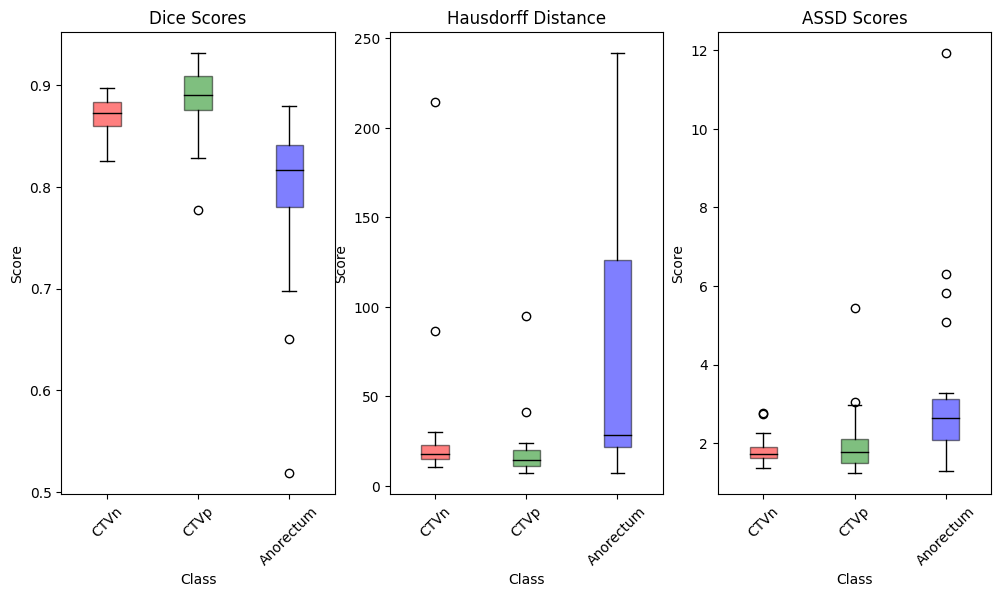

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_files = []
# Use if wanting to include all folds
for sample in samples:
    ### IF statement used to obtain box plot for a single model
    #if (sample == "OUT_F0/upsampled" or sample == "OUT_F0"):
    csv_files.append(os.path.join(results_dir, network_type, task, sample, "metrics.csv"))

print(csv_files)

mask_list = []
for item in masks:
    mask_list.append(item)

dice_scores_per_class = []
Hausdorff_scores_per_class = []
assd_scores_per_class = []

for mask in mask_list:
    dice_scores = []
    Hausdorff_scores = []
    assd_scores = []

    for csv_file in csv_files:
        results_df = pd.read_csv(csv_file)
        mask_scores = results_df[results_df['Mask'].str.startswith(mask)]
        dice_scores.extend(mask_scores['Dice'])
        Hausdorff_scores.extend(mask_scores['Hausdorff'])
        assd_scores.extend(mask_scores['ASSD'])

    dice_scores_per_class.append(dice_scores)
    Hausdorff_scores_per_class.append(Hausdorff_scores)
    assd_scores_per_class.append(assd_scores)

# Create a list of colors for class visualization
class_colors = ['red', 'green', 'blue'] + ['gray'] * (len(mask_list) - 3)  # Add more colors as needed

# Create separate box plots for each metric
plt.figure(figsize=(12, 6))

# Dice
plt.subplot(1, 3, 1)
boxplot = plt.boxplot(np.transpose(dice_scores_per_class), labels=mask_list, patch_artist=True, medianprops={'color': 'black'})
plt.title('Dice Scores')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)

for i, box in enumerate(boxplot['boxes']):
    if mask_list[i] == 'CTVn':
        box.set_facecolor('red')
        box.set_alpha(0.5)
    elif mask_list[i] == 'CTVp':
        box.set_facecolor('green')
        box.set_alpha(0.5)
    elif mask_list[i] == 'Anorectum':
        box.set_facecolor('blue')
        box.set_alpha(0.5)
    else:
        box.set_facecolor('black')
 
# Hausdorff
plt.subplot(1, 3, 2)
boxplot = plt.boxplot(np.transpose(Hausdorff_scores_per_class), labels=mask_list, patch_artist=True, medianprops={'color': 'black'})
plt.title('Hausdorff Distance')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)

for i, box in enumerate(boxplot['boxes']):
    if mask_list[i] == 'CTVn':
        box.set_facecolor('red')
        box.set_alpha(0.5)
    elif mask_list[i] == 'CTVp':
        box.set_facecolor('green')
        box.set_alpha(0.5)
    elif mask_list[i] == 'Anorectum':
        box.set_facecolor('blue')
        box.set_alpha(0.5)
    else:
        box.set_facecolor('black')
    
# ASSD
plt.subplot(1, 3, 3)
boxplot = plt.boxplot(np.transpose(assd_scores_per_class), labels=mask_list, patch_artist=True, medianprops={'color': 'black'})
plt.title('ASSD Scores')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)

for i, box in enumerate(boxplot['boxes']):
    if mask_list[i] == 'CTVn':
        box.set_facecolor('red')
        box.set_alpha(0.5)
    elif mask_list[i] == 'CTVp':
        box.set_facecolor('green')
        box.set_alpha(0.5)
    elif mask_list[i] == 'Anorectum':
        box.set_facecolor('blue')
        box.set_alpha(0.5)
    else:
        box.set_facecolor('black')
    



####################################






In [4]:
import pandas as pd
import numpy as np

# Read the CSV files for each model into a list
csv_files = []
for sample in samples:
    csv_files.append(os.path.join(results_dir, network_type, task, sample, "metrics.csv"))

dfs = [pd.read_csv(file) for file in csv_files]

# Extract unique class names
class_names = dfs[0]['Mask'].unique()

# Calculate the mean value per model and per class
mean_per_model_per_class = {}
for df in dfs:
    for class_name in class_names:
        class_df = df[df['Mask'] == class_name]
        mean_score = class_df['Dice'].mean()

        if class_name not in mean_per_model_per_class:
            mean_per_model_per_class[class_name] = []

        mean_per_model_per_class[class_name].append(mean_score)

# Calculate the standard deviation between models for each class
std_between_models_per_class = {}
for class_name, scores in mean_per_model_per_class.items():
    std_between_models_per_class[class_name] = np.std(scores)

# Print the mean value per model and per class and the standard deviation between models for each class
print("Mean per Model and per Class:")
for class_name in class_names:
    print(f"Class: {class_name}")
    for i, mean in enumerate(mean_per_model_per_class[class_name]):
        print(f"Model {i+1}: {mean}")

print("\nStandard Deviation between Models for each Class:")
for class_name, std in std_between_models_per_class.items():
    print(f"Class: {class_name}")
    print(f"Standard Deviation: {std}")
    print()


Mean per Model and per Class:
Class: Bones
Model 1: 0.9578530414641767
Model 2: 0.9555660989825683
Model 3: 0.9565754664284671
Class: FemoralHead_L
Model 1: 0.9529844624546631
Model 2: 0.9521855412215862
Model 3: 0.9504092898530112
Class: FemoralHead_R
Model 1: 0.9513162581621921
Model 2: 0.9509415085314055
Model 3: 0.9487176390915302
Class: Bladder
Model 1: 0.9637235375964333
Model 2: 0.9660949268075342
Model 3: 0.9681794613450407
Class: Anorectum
Model 1: 0.8471088391277217
Model 2: 0.843521472787287
Model 3: 0.8630654783707857
Class: Bowel-bag
Model 1: 0.9340236814062916
Model 2: 0.9347083150993681
Model 3: 0.9349282612092017
Class: Bowel-loops
Model 1: 0.909859941309848
Model 2: 0.9130167227518218
Model 3: 0.910536596889975
Class: CTVp
Model 1: 0.9153158285673128
Model 2: 0.9174934955137471
Model 3: 0.9169549723419367

Standard Deviation between Models for each Class:
Class: Bones
Standard Deviation: 0.0009357781388825292

Class: FemoralHead_L
Standard Deviation: 0.0010762516222377